# Import Libraries

In [44]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score

In [2]:
#Import data in python enviornment using pandas
train_data = pd.read_csv("/home/aniruddha/Kaggle/Titanic/train.csv")
test_data = pd.read_csv("/home/aniruddha/Kaggle/Titanic/test.csv")

# EDA

## Identify Variable types 

In [3]:
#Print first 5 observations of training data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Print first 5 observations of testing data
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#Print shape of trainging data (rows,columns)
train_data.shape

(891, 12)

In [6]:
#Print shape of testing data (rows,columns)
test_data.shape

(418, 11)

In [7]:
#Concat training and testing data
full_data = pd.concat([train_data,test_data])

/home/aniruddha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [8]:
#Print shape of total data (rows,columns)
full_data.shape

(1309, 12)

In [9]:
#Information of total data
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [10]:
#Describtion of numeric features of full data
full_data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [11]:
#Describtion of categorical features of full data
full_data.describe(include='object')

,Cabin,Embarked,Name,Sex,Ticket
count,295,1307,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Kelly, Mr. James",male,CA. 2343
freq,6,914,2,843,11


## Missing values treatment 

In [12]:
#Check for null values
full_data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

### Since the PassengerID and Name feature have 891 unique values. And Ticket feature has 681 unique values, it will be a bit tricky to convert them into useful categories.

### Cabin feature has 687 missing values which is 77.1%.

### So we will drop it from the dataset
 

In [13]:
#Drop features from traing data
train_data = train_data.drop(['Cabin','Name','PassengerId','Ticket'],axis=1)

In [14]:
#Seprating PassengerID variable from test data set for future use
index = test_data['PassengerId']

In [15]:
#Drop features from testing data
test_data = test_data.drop(['Cabin','Name','PassengerId','Ticket'],axis=1)

In [16]:
#Filling missing values with mean
train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)

In [17]:
#Filling missing values with mean
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)

In [18]:
#Filling missing values with mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0],inplace=True)

In [19]:
#Filling missing values with mode
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0],inplace=True)

In [20]:
#Filling missing values with forward fill
train_data['Fare'].fillna(method='ffill',inplace=True)

In [21]:
#Filling missing values with forward fill
test_data['Fare'].fillna(method='ffill',inplace=True)

In [22]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [23]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Data Visualization 

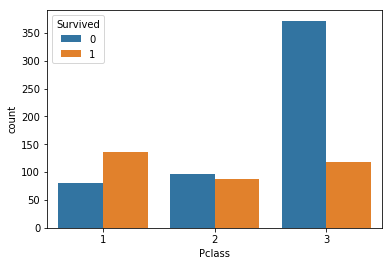

In [24]:
sns.countplot(x = 'Pclass',hue = 'Survived',data=train_data)

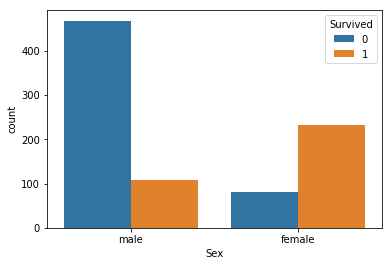

In [39]:
sns.countplot(x = 'Sex',hue = 'Survived',data=train_data)

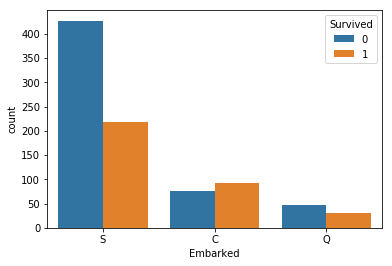

In [40]:
sns.countplot(x = 'Embarked',hue = 'Survived',data=train_data)

/home/aniruddha/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/aniruddha/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/aniruddha/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/aniruddha/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, *

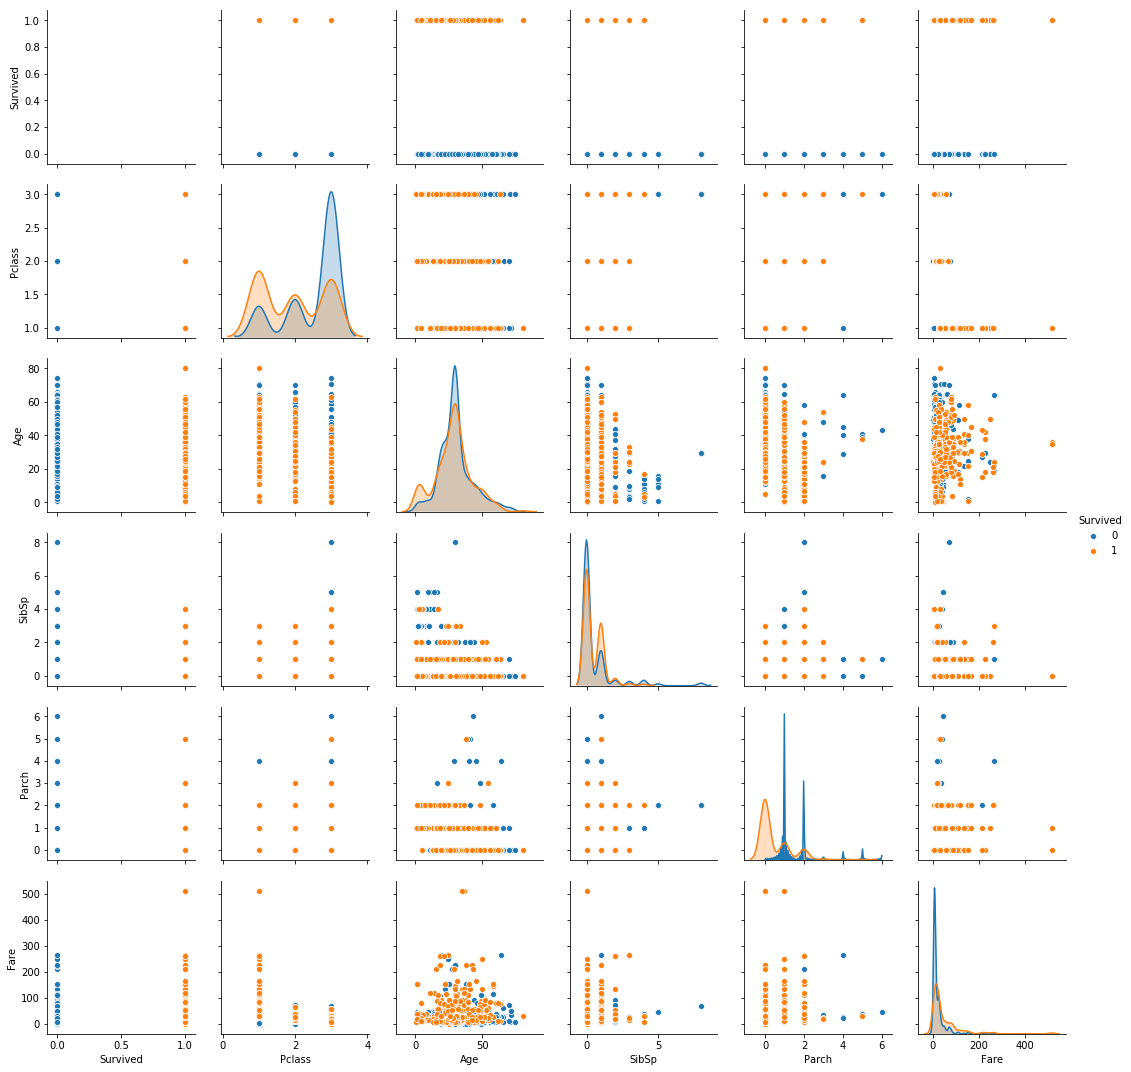

In [42]:
sns.pairplot(train_data, hue ='Survived')

Text(0.5,1,'Male')

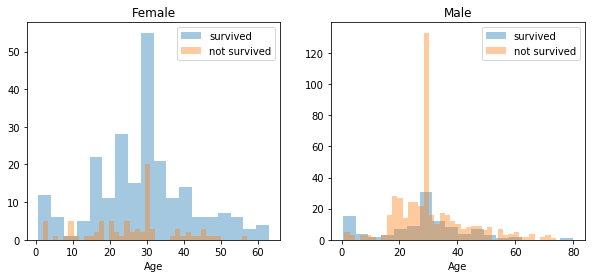

In [45]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_data[train_data['Sex']=='female']
men = train_data[train_data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age, bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age, bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age, bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age, bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

Text(0.5,1,'Male')

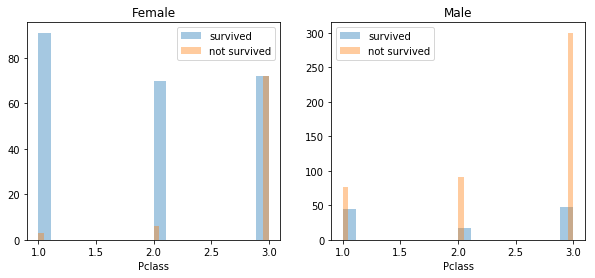

In [46]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_data[train_data['Sex']=='female']
men = train_data[train_data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Pclass, bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Pclass, bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Pclass, bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Pclass, bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

/home/aniruddha/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


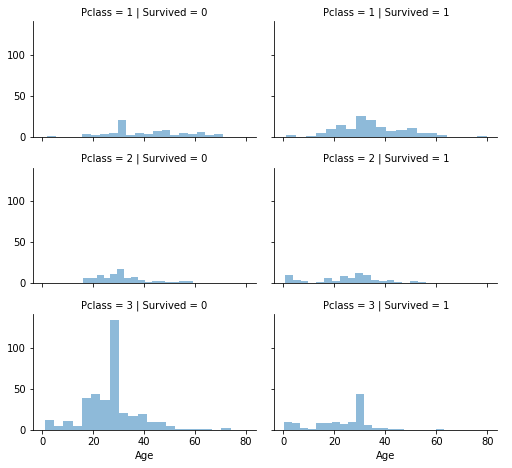

In [47]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

## Feature Engineering 

In [25]:
train_data_num = train_data.select_dtypes(include=[np.number])
train_data_cat = train_data.select_dtypes(include='object')

In [26]:
train_data_dummies = pd.get_dummies(train_data_cat)

In [27]:
train_merge = pd.concat([train_data_num,train_data_dummies],axis=1)

In [28]:
test_data_num = test_data.select_dtypes(include=[np.number])
test_data_cat = test_data.select_dtypes(include='object')

In [29]:
test_data_dummies = pd.get_dummies(test_data_cat)

In [30]:
test_merge = pd.concat([test_data_num,test_data_dummies],axis=1)

# Split into Traing and Testing Data

In [31]:
x_train = train_merge.drop(['Survived'],axis = 1)
y_train = train_merge['Survived']
x_test = test_merge

# Model Fitting

In [32]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=7)
nb = GaussianNB()
xgb = XGBClassifier()

In [33]:
lr_score = cross_val_score(lr, x_train, y_train, cv=4, scoring='accuracy')
dt_score = cross_val_score(dt, x_train, y_train, cv=4, scoring='accuracy')
rf_score = cross_val_score(rf, x_train, y_train, cv=4, scoring='accuracy')
knn_score = cross_val_score(knn, x_train, y_train, cv=4, scoring='accuracy')
nb_score = cross_val_score(nb, x_train, y_train, cv=4, scoring='accuracy')
xgb_score = cross_val_score(xgb, x_train, y_train, cv=4, scoring='accuracy')

/home/aniruddha/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/aniruddha/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/aniruddha/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/aniruddha/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empt

In [34]:
print('Logistic Regression: ',lr_score)
print('Decision Tree: ',dt_score)
print('Random Forest: ',rf_score)
print('K Nearest Neighbors: ',knn_score)
print('Naive Bayes: ',nb_score)
print('XGBoost: ',xgb_score)

Logistic Regression:  [0.77678571 0.81165919 0.76576577 0.80630631]
Decision Tree:  [0.72321429 0.78475336 0.78378378 0.76126126]
Random Forest:  [0.75446429 0.85201794 0.81081081 0.81981982]
K Nearest Neighbors:  [0.625      0.70852018 0.69369369 0.75225225]
Naive Bayes:  [0.75892857 0.80717489 0.78378378 0.79279279]
XGBoost:  [0.77232143 0.83856502 0.81081081 0.83333333]


In [35]:
#mean
l_m = lr_score.mean()
d_m = dt_score.mean()
r_m = rf_score.mean()
k_m = knn_score.mean()
n_m = nb_score.mean()
x_m = xgb_score.mean()

#Stdev
l_s = lr_score.std()
d_s = dt_score.std()
r_s = rf_score.std()
k_s = knn_score.std()
n_s = nb_score.std()
x_s = xgb_score.std()

In [36]:
score = pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Random Forest','K Nearest Neighbors','Naive Bayes','XGBoost'],
        'Accuracy':[l_m,d_m,r_m,k_m,n_m,x_m],
        'Stdev':[l_s, d_s, r_s, k_s, n_s, x_s]})
average_scores = score.sort_values(by='Accuracy', ascending=False)
average_scores


,Model,Accuracy,Stdev
5,XGBoost,0.813758,0.026097
2,Random Forest,0.809278,0.035159
0,Logistic Regression,0.790129,0.019345
4,Naive Bayes,0.785670,0.017549
1,Decision Tree,0.763253,0.024954
3,K Nearest Neighbors,0.694867,0.045723


In [37]:
xgb.fit(x_train,y_train)
y_test = xgb.predict(x_test)

/home/aniruddha/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [38]:
output = pd.DataFrame({'PassengerId': index, 'Survived': y_test})
output.to_csv('/home/aniruddha/Kaggle/Titanic/my_submission.csv', index=False)

### After analyzing all the models we can conclude that predictors Sex, Pclass and Age did played a major role for titanic survivors.

### Female has more survival rate than male

### Pclass 1 have more survival rate followed by Pclass 2 and Pclass 3 have very less survival rate

### Below 10 years kids have more survival rate in both male and female

### I ran many graphs with different features, And Each algorithm gives differnet results. No algorithm can predict with 100% accuracy. 

### Comparing the accuracy of different models, XGBoost is the best model with an accuracy of 81% followed by Random Forest with an accuracy of 80%. 